In [ ]:
!pip install pennylane

[0. 0. 0. 0. 0. 0. 1. 0.]
Binary string found : 110


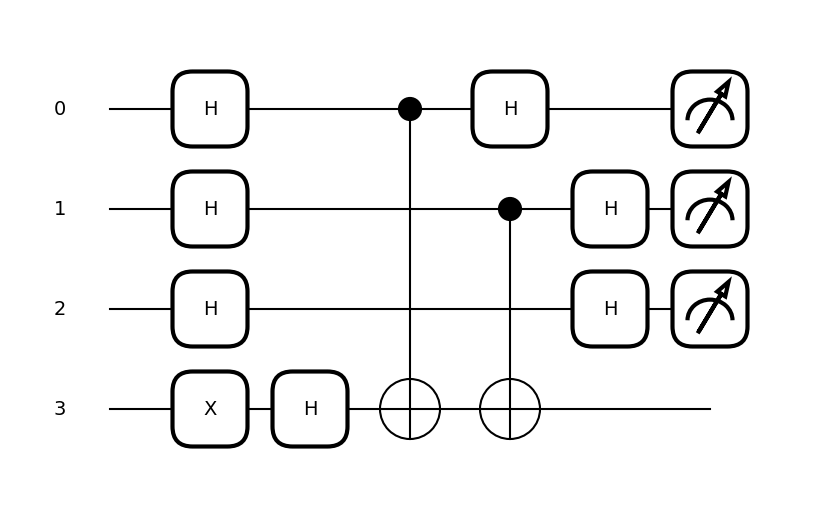

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define the hidden binary string s (for example, s = '110')
s = '110'


n_qubits = len(s)  # Number of input qubits
dev = qml.device('default.qubit', wires=n_qubits + 1)

@qml.qnode(dev)
def bernstein_vazirani(s):
    # Steps 1-2: Initialization and superposition
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    qml.PauliX(wires=n_qubits)
    qml.Hadamard(wires=n_qubits)

    # Step 3 : Apply the oracle for the binary string s
    for i in range(n_qubits):
        if s[i] == '1':
            qml.CNOT(wires=[i, n_qubits])

    # Step 4 : Hadamard Transform
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    # Étape 5 : Mesure des qubits d'entrée
    return qml.probs(wires=range(n_qubits))



# Execute the circuit with the binary string s
probs = bernstein_vazirani(s)
print(probs)

#∣000⟩, ∣001⟩, ∣010⟩, ∣011⟩, ∣100⟩, ∣101⟩, ∣110⟩, ∣111⟩

result = np.argmax(probs)

binary_result = f"{result:0{n_qubits}b}"  # Convert the probability vector to a binary chain

print(f"Binary string found : {binary_result}")

# Draw the circuit with Matplotlib
fig, ax = qml.draw_mpl(bernstein_vazirani)(s)
plt.show()
